# Visualization of graphs
We need a way to visualize the graphs. Explore library that works

## Pyvis
https://pyvis.readthedocs.io/en/latest/install.html#install-with-pip

In [ ]:
# Install deps

# !pip install pyvis

In [ ]:
from pyvis.network import Network
net = Network(notebook=True, cdn_resources='remote')

In [ ]:
net.add_node(0, label='a')
net.add_node(1, label='b')
net.add_node(3, label='c')
net.add_edge(0, 1)
net.add_edge(0, 3)

In [ ]:
net.show('mygraph.html')

## Using Matplotlib and Networkx

In [ ]:
# !pip install matplotlib networkx

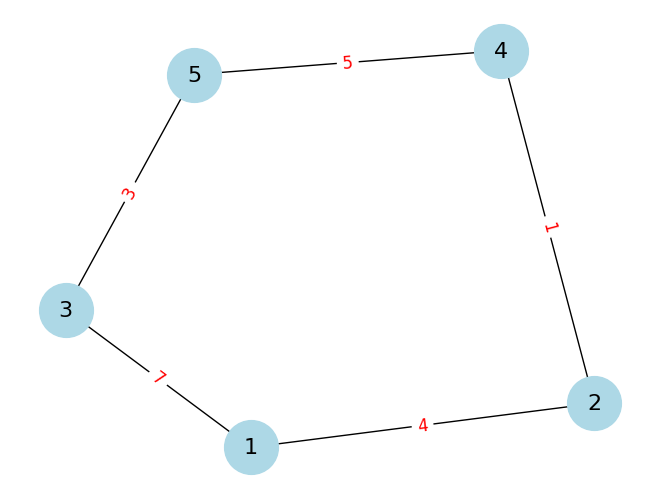

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges with weights (labels)
G.add_edge(1, 2, weight=4)
G.add_edge(1, 3, weight=7)
G.add_edge(2, 4, weight=1)
G.add_edge(3, 5, weight=3)
G.add_edge(4, 5, weight=5)

# Define positions for a consistent layout
pos = nx.spring_layout(G)


# Retrieve the edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')

# Draw edge labels
nx.draw(G, pos, edge_labels=edge_labels, font_color='red', font_size=12, edge_labels=edge_labels)

# Display the graph
plt.show()


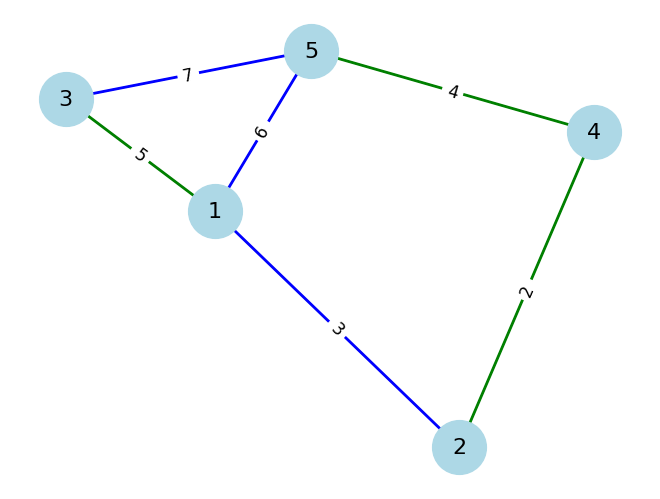

In [62]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Create a graph
G = nx.Graph()

# Add nodes and edges with weights
edges_with_weights = [
    (1, 2, 3),
    (1, 3, 5),
    (2, 4, 2),
    (3, 5, 7),
    (4, 5, 4),
    (1, 5, 6),
]
G.add_weighted_edges_from(edges_with_weights)

# Define positions for a consistent layout
pos = nx.spring_layout(G)

# Assign colors to edges, with half in a different color
edges = list(G.edges)
half_edges = random.sample(edges, len(edges) // 2)  # Randomly select half the edges
edge_colors = ["blue" if edge in half_edges else "green" for edge in edges]

# Draw the nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=16)

# Draw the edges with specified colors
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Display the graph
plt.show()


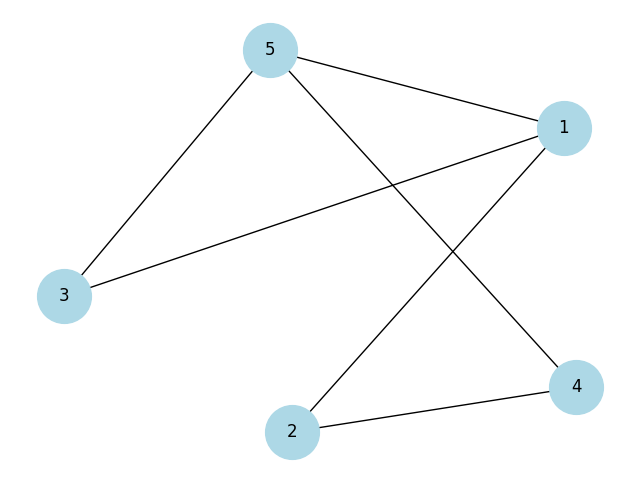

In [68]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create an empty graph
G = nx.Graph()

# Define edges with weights to add
edges_with_weights = [
    (1, 2, 3),
    (1, 3, 5),
    (2, 4, 2),
    (3, 5, 7),
    (4, 5, 4),
    (1, 5, 6),
]

# Add all nodes first to ensure positions are set
nodes = {edge[0] for edge in edges_with_weights}.union({edge[1] for edge in edges_with_weights})
G.add_nodes_from(nodes)

# Layout for consistent node positioning
pos = nx.spring_layout(G)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Function to initialize the graph (clears it for each animation)
def init():
    ax.clear()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, ax=ax)
    return ax,

# Animation function to add edges one at a time
def animate(i):
    ax.clear()
    G.add_edge(*edges_with_weights[i][:2], weight=edges_with_weights[i][2])  # Add the edge
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, ax=ax)
    
    # Draw the edges with weights as labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, ax=ax)
    return ax,

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(edges_with_weights), init_func=init, repeat=False, interval=1000)

# Display the animation in Jupyter Notebook
HTML(ani.to_jshtml())
